# Book reccomendation

## Problem 

**Book recommendations - „I like Lord of the Rings, what else should I read?“**

Goal:
- take some data, try some approaches, produce some code, get some results
- then come and show us your solution and have a chat around it - show how you think about a specific problem, how you are able to explain what approach you used and why, think about the limitations of the approach and how things could be improved if there was more time, what you think of the results and if they make sense, etc.

Philosophy:
- the actual result and code are not that important – the journey there and potential future paths are more important
- if you are able to follow-through with some ideas then great, if you just start something and have a clear idea on how to proceed that is also useful
- the expectation is that you will spend an evening or two with the task (but there are no bounds to proactivity if you enjoy playing with the problem)

Data:
- available open dataset: http://www2.informatik.uni-freiburg.de/~cziegler/BX/
- alternatively feel free to grab any other relevant data set

Tools:
- use whatever you are comfortable in (R, Python, Matlab, Java, SQL,…) or feel free to use it as an opportunity to try out a new language
- it is not a contest in finding the best black-box library and blindly using it – own solutions are preferred even if they are simple
- how to present: up to you – slides, walking through code, drawing, …

## Solution

### Load data

In [1]:
# ! pip install pandas
# ! pip install seaborn

In [2]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\elieb\miniconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\elieb\miniconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\elieb\miniconda3\lib\site-packages\numpy\.libs\libopenblas.JPIJNSWNNAN3CE6LLI5FWSPHUT2VXMTH.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [3]:
# Read the csv file
csvFolder = "BX-CSV-Dump"

csvRatings = "BX-Book-Ratings.csv"
csvBooks = "BX-Books.csv"
csvUsers = "BX-Users.csv"

ratings = pd.read_csv(f"{csvFolder}/{csvRatings}", sep=';', encoding= 'unicode_escape')
books = pd.read_csv(f"{csvFolder}/{csvBooks}", sep=';', encoding='ansi', escapechar='\\')
users = pd.read_csv(f"{csvFolder}/{csvUsers}", sep=';', encoding= 'unicode_escape')

display("RATINGS", ratings.head()), display("BOOKS", books.head()), display("USERS", users.head())

'RATINGS'

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


'BOOKS'

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


'USERS'

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


(None, None, None)

In [4]:
for name, table in zip(["RATINGS", "BOOKS", "USERS"],[ratings, books, users]):
    print(f"{name}\n----\n{table.dtypes}\n") 

RATINGS
----
User-ID         int64
ISBN           object
Book-Rating     int64
dtype: object

BOOKS
----
ISBN                   object
Book-Title             object
Book-Author            object
Year-Of-Publication     int64
Publisher              object
Image-URL-S            object
Image-URL-M            object
Image-URL-L            object
dtype: object

USERS
----
User-ID       int64
Location     object
Age         float64
dtype: object



In [5]:
print(f"number of ratings: {len(ratings)}")
print(f"number of books: {len(books)}")
print(f"number of users: {len(users)}")

number of ratings: 1149780
number of books: 271379
number of users: 278858


## Explore data

How are the rating values distributed? We can see that most of the ratings are implicit (0)

Text(0.5, 1.0, 'distribution of all book ratings')

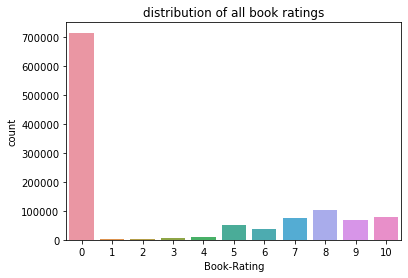

In [6]:
fig, ax = plt.subplots()
sns.countplot(data = ratings, x = "Book-Rating")
ax.set_title("distribution of all book ratings")

Distribution of the explicit ratings only (1-10)

Text(0.5, 1.0, 'distribution of explicit book ratings')

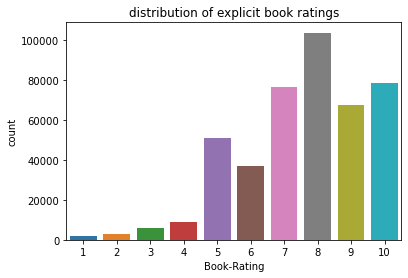

In [7]:
fig, ax = plt.subplots()
sns.countplot(data = ratings[ratings["Book-Rating"] > 0], x = "Book-Rating")
ax.set_title("distribution of explicit book ratings")

Number of ratings per book:

First of all, let's have a look at the number of unique ISBN in ratings and in the books table. We can see that the numbers do not match. There are ratings for more books than there are books in the book-table

In [8]:
ratings.ISBN.nunique(), books.ISBN.nunique()

(340556, 271379)

Let's have a look at whether the books in the book-table are all present in the ratings-table. In other words - what is the overlap of these two tables?

In [9]:
books.ISBN.isin(ratings.ISBN).sum()

270170

In [10]:
books_innerjoin = books.merge(ratings, on="ISBN", how="inner")
print(f"number of records with books from database: {len(books_innerjoin)}")
print(f"number of unique books: {books_innerjoin.ISBN.nunique()}")
display(books_innerjoin.head())

number of records with books from database: 1031175
number of unique books: 270170


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2,0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8,5
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11400,0
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11676,8
4,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,41385,0


Some ISBN contains "X". "The only letter which can be in an ISBN is an X to represent ten, and that only in the final (checksum) position"

The author of the dataset claims that " Invalid ISBNs have already been removed from the dataset."

In [11]:
books.ISBN.unique()[:50]

array(['0195153448', '0002005018', '0060973129', '0374157065',
       '0393045218', '0399135782', '0425176428', '0671870432',
       '0679425608', '074322678X', '0771074670', '080652121X',
       '0887841740', '1552041778', '1558746218', '1567407781',
       '1575663937', '1881320189', '0440234743', '0452264464',
       '0609804618', '1841721522', '1879384493', '0061076031',
       '0439095026', '0689821166', '0971880107', '0345402871',
       '0345417623', '0684823802', '0375759778', '0425163091',
       '3404921038', '3442353866', '3442410665', '3442446937',
       '0375406328', '0446310786', '0449005615', '0060168013',
       '038078243X', '055321215X', '067176537X', '0061099686',
       '0553582909', '0671888587', '0553582747', '0425182908',
       '042518630X', '0440223571'], dtype=object)

In [12]:
ratingsPerBook = ratings.groupby(by="ISBN").count()
display(ratingsPerBook.head())

,User-ID,Book-Rating
ISBN,,
0330299891,2,2
0375404120,2,2
0586045007,1,1
9022906116,2,2
9032803328,1,1


Text(0.5, 1.0, 'distribution of book ratings')

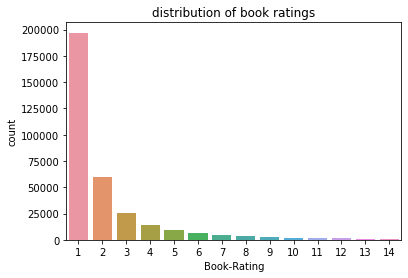

In [13]:
fig, ax = plt.subplots()
sns.countplot(data = ratingsPerBook[ratingsPerBook["Book-Rating"] < 15], x= "Book-Rating")
ax.set_title("distribution of book ratings")

## recommend books

Select books by Tolkien - try to find LOTR. In our case, there is only the trilogy 

In [14]:
books[books["Book-Author"].isin(['Tolkien'])]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
120290,2266046519,Le Retour Du Roi,Tolkien,0,Pocket,http://images.amazon.com/images/P/2266046519.0...,http://images.amazon.com/images/P/2266046519.0...,http://images.amazon.com/images/P/2266046519.0...
120293,2266046500,Les Deux Tours,Tolkien,0,Pocket,http://images.amazon.com/images/P/2266046500.0...,http://images.amazon.com/images/P/2266046500.0...,http://images.amazon.com/images/P/2266046500.0...
120294,2266046497,Le Seigneur Des Anneaux,Tolkien,0,Pocket,http://images.amazon.com/images/P/2266046497.0...,http://images.amazon.com/images/P/2266046497.0...,http://images.amazon.com/images/P/2266046497.0...


Select the ISBN of these three books

In [15]:
lotrISBN = list(books[books["Book-Author"].isin(['Tolkien'])].ISBN)
lotrISBN

['2266046519', '2266046500', '2266046497']

Find ratings for the trilogy in the ratings-table. We can see that there are both implicit and explicit ratings present in our subset

In [16]:
lotrRatings = ratings[ratings["ISBN"].isin(lotrISBN)]
lotrRatings

,User-ID,ISBN,Book-Rating
312615,75293,2266046497,8
312616,75293,2266046500,8
312617,75293,2266046519,8
375525,90277,2266046497,0
375526,90277,2266046500,0
375527,90277,2266046519,8
643348,155355,2266046497,10
730052,176318,2266046497,0
998834,239736,2266046497,10
998835,239736,2266046500,10


Let's try to take only implicit ratings higher than 7 

(a point for discussion: we could use all of the ratings including the implicit ones - some people might have interacted with the book, liked it but did not give a rating)

In [17]:
goodLotrRating = lotrRatings[lotrRatings["Book-Rating"] > 7]
goodLotrRating

,User-ID,ISBN,Book-Rating
312615,75293,2266046497,8
312616,75293,2266046500,8
312617,75293,2266046519,8
375527,90277,2266046519,8
643348,155355,2266046497,10
998834,239736,2266046497,10
998835,239736,2266046500,10
998836,239736,2266046519,10


Select IDs of users who have rated at leas one of the books > 7

In [18]:
goodLotrRatingUsers = list(set(goodLotrRating["User-ID"]))
goodLotrRatingUsers

[239736, 155355, 75293, 90277]

for each user find their books

In [19]:
dfUsers = {}
for user in goodLotrRatingUsers:
    userDf = ratings[ratings["User-ID"] == user]
    dfUsers[user] = userDf

idea: some users give every book a 10, while some users *never* use a 10 for any book. the range varies, the prediction might be scaled according to the way each users rating scale. also, as mentioned above, the implicit ratings may be of some use as well 

Take books which have been rated high by the users who rated LOTR trilogy high as well. Now I chose to use books with >= 7  for simplicity

In [20]:
ISBNAboveOrEqualN = []
N =  7

for userID, df in dfUsers.items():
    RatingsAboveOrEqualN = df[df["Book-Rating"]>=N]
    ISBNAboveOrEqualN.append(list(RatingsAboveOrEqualN.ISBN))
    print("\nUserID:", userID, "\nnumber of ratings:", len(df), f"\nnumber of ratings >= {N}:", len(RatingsAboveOrEqualN))
    
# flatten list
import itertools
ISBNAboveOrEqualN = list(itertools.chain.from_iterable(ISBNAboveOrEqualN))
# ISBNAboveOrEqualN


UserID: 239736 
number of ratings: 38 
number of ratings >= 7: 25

UserID: 155355 
number of ratings: 5 
number of ratings >= 7: 3

UserID: 75293 
number of ratings: 6 
number of ratings >= 7: 6

UserID: 90277 
number of ratings: 60 
number of ratings >= 7: 26


Remove LOTR ISBNs from the list

In [21]:
ISBNAboveOrEqualN_noLOTR = [i for i in ISBNAboveOrEqualN if i not in lotrISBN]

Check for count - if any books get reccomended multiple times, put it higher on the listISBNAboveOrEqualN

In [22]:
from collections import Counter
ISBNandNumberOfRatings = dict(Counter(ISBNAboveOrEqualN_noLOTR))
ISBNandNumberOfRatingsSorted = {k: v for k, v in sorted(ISBNandNumberOfRatings.items(), key=lambda item: item[1], reverse=True)}
print(ISBNandNumberOfRatingsSorted)

{'009188800X': 1, '0330306839': 1, '0345331397': 1, '0552137030': 1, '0552143243': 1, '0752223844': 1, '0836210263': 1, '0836213319': 1, '0836217373': 1, '0836217586': 1, '0836217799': 1, '0836228995': 1, '1853049409': 1, '2038710317': 1, '2070301028': 1, '2070408450': 1, '2207303519': 1, '2207500438': 1, '2253007153': 1, '2253146889': 1, '2266027263': 1, '287714125X': 1, '2858152950': 1, '2869433972': 1, '2070415732': 1, '2253004332': 1, '2253006920': 1, '2.207.50119.1': 1, '2070299732': 1, '2070416151': 1, '2207247279': 1, '2226067582': 1, '2226109218': 1, '2246342716': 1, '2253063339': 1, '2253137243': 1, '2266022504': 1, '2266061348': 1, '2266071556': 1, '2266083988': 1, '2266099701': 1, '2266111396': 1, '2266111515': 1, '2290049638': 1, '2290050881': 1, '2290311286': 1, '2290311294': 1, '2290315095': 1, '2290319937': 1, '2702807844': 1, '2841721949': 1, '2877302202': 1}


Let's have a look at the books which occur more than one time and find what books are they

In [23]:
recommendedMultipleTimes = {k: v for k, v in ISBNandNumberOfRatingsSorted.items() if v>1}
print("isbn predicted multiple times:", recommendedMultipleTimes.keys())
display(books[books.ISBN.isin(recommendedMultipleTimes.keys())])

isbn predicted multiple times: dict_keys([])


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L


In [24]:
recommendBooksWithoutLotr = books[books["ISBN"].isin(ISBNAboveOrEqualN_noLOTR)]
print("\ntotal number of reccomended books:", len(recommendBooksWithoutLotr))
display(recommendBooksWithoutLotr.head())


total number of reccomended books: 43


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
819,2253063339,Les Fourmis,Bernard Werber,2002,LGF,http://images.amazon.com/images/P/2253063339.0...,http://images.amazon.com/images/P/2253063339.0...,http://images.amazon.com/images/P/2253063339.0...
6144,0330306839,Holidays In Hell,P J Orourke,0,Pan Books Ltd,http://images.amazon.com/images/P/0330306839.0...,http://images.amazon.com/images/P/0330306839.0...,http://images.amazon.com/images/P/0330306839.0...
9647,2070408450,Saga,Tonino Benacquista,1999,Gallimard,http://images.amazon.com/images/P/2070408450.0...,http://images.amazon.com/images/P/2070408450.0...,http://images.amazon.com/images/P/2070408450.0...
10122,0345331397,"I, Robot",Isaac Asimov,1989,Del Rey Books,http://images.amazon.com/images/P/0345331397.0...,http://images.amazon.com/images/P/0345331397.0...,http://images.amazon.com/images/P/0345331397.0...
10565,2253137243,Le Jour des fourmis,Bernard Werber,1995,LGF,http://images.amazon.com/images/P/2253137243.0...,http://images.amazon.com/images/P/2253137243.0...,http://images.amazon.com/images/P/2253137243.0...


In [25]:
AuthorCountRecommend = recommendBooksWithoutLotr.groupby(by="Book-Author").count()
AuthorCountRecommendSort = AuthorCountRecommend.sort_values(by="ISBN", ascending=False).reset_index()
AuthorCountRecommendSort

,Book-Author,ISBN,Book-Title,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,Scott Adams,7,7,7,7,7,7,7
1,Terry Pratchett,4,4,4,4,4,4,4
2,Pierre Bordage,4,4,4,4,4,4,4
3,Bernard Werber,3,3,3,3,3,3,3
4,Tonino Benacquista,2,2,2,2,2,2,2
5,Edgar Allan Poe,2,2,2,2,2,2,2
6,Marguerite Yourcenar,1,1,1,1,1,1,1
7,Simmons,1,1,1,1,1,1,1
8,Robert Sheckley,1,1,1,1,1,1,1
9,Ray Bradbury,1,1,1,1,1,1,1


Now there are several possibilities. If I was to have any rating history as a user, I could've removed some recommended books from the list. The rest can be sorted by the author - e.g., the most popular books each of them - show these first, then continue with recommending the books from less read authors

For instance, I am going to recommend 10 books now, select top 10 authors from the  dataframe of recommendations

In [26]:
top5Authors = AuthorCountRecommendSort["Book-Author"][:10]
top5Authors

0             Scott Adams
1         Terry Pratchett
2          Pierre Bordage
3          Bernard Werber
4      Tonino Benacquista
5         Edgar Allan Poe
6    Marguerite Yourcenar
7                 Simmons
8         Robert Sheckley
9            Ray Bradbury
Name: Book-Author, dtype: object

Select the books by these authors

In [27]:
topAuthorBooksRecommend = recommendBooksWithoutLotr[recommendBooksWithoutLotr["Book-Author"].isin(top5Authors)]
topAuthorBooksRecommend.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
819,2253063339,Les Fourmis,Bernard Werber,2002,LGF,http://images.amazon.com/images/P/2253063339.0...,http://images.amazon.com/images/P/2253063339.0...,http://images.amazon.com/images/P/2253063339.0...
9647,2070408450,Saga,Tonino Benacquista,1999,Gallimard,http://images.amazon.com/images/P/2070408450.0...,http://images.amazon.com/images/P/2070408450.0...,http://images.amazon.com/images/P/2070408450.0...
10565,2253137243,Le Jour des fourmis,Bernard Werber,1995,LGF,http://images.amazon.com/images/P/2253137243.0...,http://images.amazon.com/images/P/2253137243.0...,http://images.amazon.com/images/P/2253137243.0...
11335,0836217799,Bring Me The Head Of Willy The Mailboy!,Scott Adams,1995,Andrews McMeel Publishing,http://images.amazon.com/images/P/0836217799.0...,http://images.amazon.com/images/P/0836217799.0...,http://images.amazon.com/images/P/0836217799.0...
20573,0836228995,Casual Day Has Gone Too Far,Scott Adams,1997,Andrews McMeel Publishing,http://images.amazon.com/images/P/0836228995.0...,http://images.amazon.com/images/P/0836228995.0...,http://images.amazon.com/images/P/0836228995.0...


Count number of ratings (both implicit and explicit now => more interaction, more popularity)

In [28]:
topAuthorBooksRecommend_ISBN = topAuthorBooksRecommend.ISBN
topAuthorBooksRecommend_ISBN_ratings = ratings[ratings["ISBN"].isin(topAuthorBooksRecommend_ISBN)]
topAuthorBooksRecommend_ISBN_ratings_count = topAuthorBooksRecommend_ISBN_ratings.groupby(by="ISBN").count().reset_index()
topAuthorBooksRecommend_ISBN_ratings_count_sorted = topAuthorBooksRecommend_ISBN_ratings_count.sort_values(by="Book-Rating", ascending=False)
# add authors
topAuthorBooksRecommend_ISBN_ratings_count_sorted = topAuthorBooksRecommend_ISBN_ratings_count_sorted.merge(books, on="ISBN", how="left")
topAuthorBooksRecommend_ISBN_ratings_count_sorted.head()

,ISBN,User-ID,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,2253063339,35,35,Les Fourmis,Bernard Werber,2002,LGF,http://images.amazon.com/images/P/2253063339.0...,http://images.amazon.com/images/P/2253063339.0...,http://images.amazon.com/images/P/2253063339.0...
1,0836210263,30,30,Still Pumped From Using The Mouse,Scott Adams,1996,Andrews McMeel Publishing,http://images.amazon.com/images/P/0836210263.0...,http://images.amazon.com/images/P/0836210263.0...,http://images.amazon.com/images/P/0836210263.0...
2,0836213319,26,26,Dilbert: A Book of Postcards,Scott Adams,1996,Andrews McMeel Pub,http://images.amazon.com/images/P/0836213319.0...,http://images.amazon.com/images/P/0836213319.0...,http://images.amazon.com/images/P/0836213319.0...
3,2070301028,17,17,Quelqu'un d'autre,Tonino Benacquista,2003,Gallimard,http://images.amazon.com/images/P/2070301028.0...,http://images.amazon.com/images/P/2070301028.0...,http://images.amazon.com/images/P/2070301028.0...
4,0836217799,14,14,Bring Me The Head Of Willy The Mailboy!,Scott Adams,1995,Andrews McMeel Publishing,http://images.amazon.com/images/P/0836217799.0...,http://images.amazon.com/images/P/0836217799.0...,http://images.amazon.com/images/P/0836217799.0...


Display the recommended books. The recommendation is quite successful in my opinion. Prachett, Bradbury, Adams and many more are authors of fantasy, scifi and fiction in general.

In [29]:
topbooks = topAuthorBooksRecommend_ISBN_ratings_count_sorted.groupby(by="Book-Author").first().reset_index()
for line in topbooks.iterrows():
    _, line = line
    print(line["Book-Author"],"|", line["Book-Title"], line["Image-URL-M"])

Bernard Werber | Les Fourmis http://images.amazon.com/images/P/2253063339.01.MZZZZZZZ.jpg
Edgar Allan Poe | Histoires extraordinaires http://images.amazon.com/images/P/2253006920.01.MZZZZZZZ.jpg
Marguerite Yourcenar | Nouvelles Orientales http://images.amazon.com/images/P/2070299732.01.MZZZZZZZ.jpg
Pierre Bordage | Wang, tome 1 : Les Portes d'Occident http://images.amazon.com/images/P/2290311286.01.MZZZZZZZ.jpg
Ray Bradbury | Fahrenheit 451 (Collection Folio) http://images.amazon.com/images/P/2070415732.01.MZZZZZZZ.jpg
Robert Sheckley | PÃ?Â¨lerinage Ã?Â  la terre http://images.amazon.com/images/P/2207500438.01.MZZZZZZZ.jpg
Scott Adams | Still Pumped From Using The Mouse http://images.amazon.com/images/P/0836210263.01.MZZZZZZZ.jpg
Simmons | Endymion, tome 1 http://images.amazon.com/images/P/2266083988.01.MZZZZZZZ.jpg
Terry Pratchett | The Discworld Mapp http://images.amazon.com/images/P/0552143243.01.MZZZZZZZ.jpg
Tonino Benacquista | Quelqu'un d'autre http://images.amazon.com/images/P/

See the book covers

In [30]:
for line in topbooks.iterrows():
    _, line = line
    img = line["Image-URL-M"]
    print(f"<img src={img}/>", end=" ")

<img src=http://images.amazon.com/images/P/2253063339.01.MZZZZZZZ.jpg/> <img src=http://images.amazon.com/images/P/2253006920.01.MZZZZZZZ.jpg/> <img src=http://images.amazon.com/images/P/2070299732.01.MZZZZZZZ.jpg/> <img src=http://images.amazon.com/images/P/2290311286.01.MZZZZZZZ.jpg/> <img src=http://images.amazon.com/images/P/2070415732.01.MZZZZZZZ.jpg/> <img src=http://images.amazon.com/images/P/2207500438.01.MZZZZZZZ.jpg/> <img src=http://images.amazon.com/images/P/0836210263.01.MZZZZZZZ.jpg/> <img src=http://images.amazon.com/images/P/2266083988.01.MZZZZZZZ.jpg/> <img src=http://images.amazon.com/images/P/0552143243.01.MZZZZZZZ.jpg/> <img src=http://images.amazon.com/images/P/2070301028.01.MZZZZZZZ.jpg/> 

<img src=http://images.amazon.com/images/P/2253063339.01.MZZZZZZZ.jpg/> <img src=http://images.amazon.com/images/P/2253006920.01.MZZZZZZZ.jpg/> <img src=http://images.amazon.com/images/P/2070299732.01.MZZZZZZZ.jpg/> <img src=http://images.amazon.com/images/P/2290311286.01.MZZZZZZZ.jpg/> <img src=http://images.amazon.com/images/P/2070415732.01.MZZZZZZZ.jpg/> <img src=http://images.amazon.com/images/P/2207500438.01.MZZZZZZZ.jpg/> <img src=http://images.amazon.com/images/P/0836210263.01.MZZZZZZZ.jpg/> <img src=http://images.amazon.com/images/P/2266083988.01.MZZZZZZZ.jpg/> <img src=http://images.amazon.com/images/P/0552143243.01.MZZZZZZZ.jpg/> <img src=http://images.amazon.com/images/P/2070301028.01.MZZZZZZZ.jpg/> 

## Summary

The goal was to give recommendation for a user who likes Lord of the Rings trilogy.
I have explored the dataset, extracted books by J.R.R. Tolkien and used their ISBN to match the database of ratings. Then I tried to recommend some new books to the user based on what other users (who liked LOTR as well) enjoyed reading. 

From the data of users who liked LOTR I picked top 10 authors and selected their most popular book. These books are the recommended ones.

Of course there are other ways to make predictions and some things to think about. I share some of them in the list below

Think about:
- how many books to recommend
- what books to recommend?
- check my other favourite books to improve the recommendation
- check the age of the users and filter out only my peers for further recommendation
- recommend more books from the authors who are more popular
- by book cover?
- year of publishing (e.g. I like 20th century fiction)